Saving Churn_Modelling.csv to Churn_Modelling.csv
Initial rows: 10000


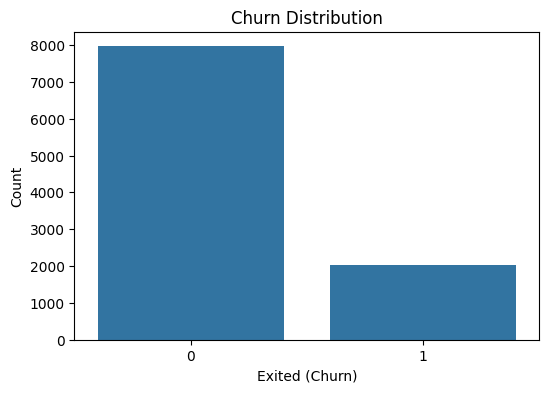

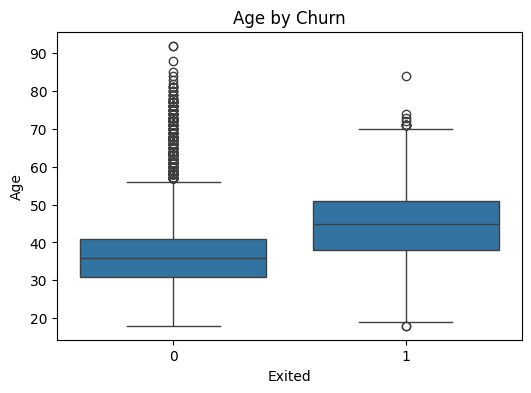

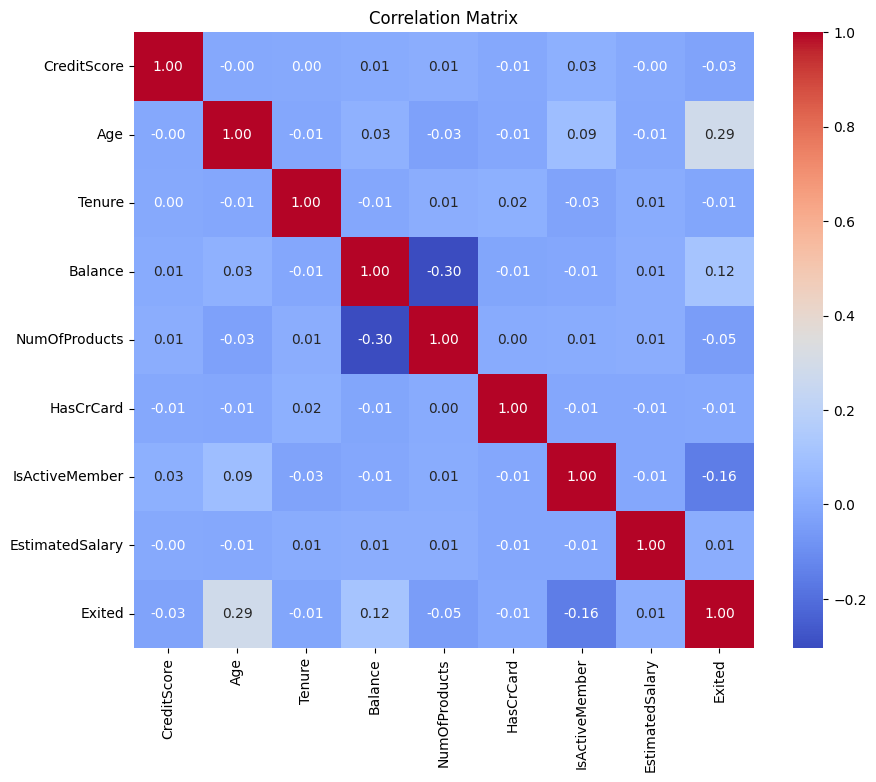


Logistic Regression Results
Accuracy: 0.811
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



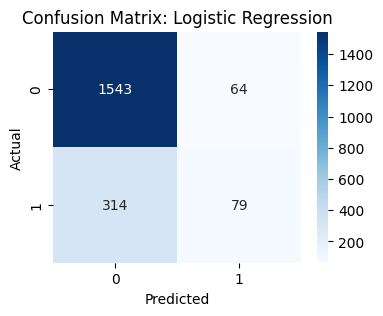


Random Forest Results
Accuracy: 0.8635
[[1543   64]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



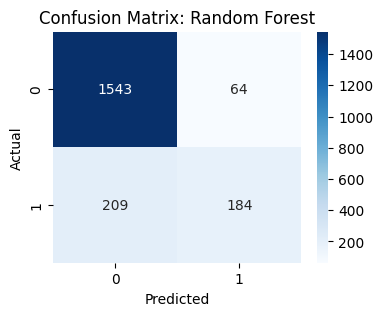


XGBoost Results
Accuracy: 0.864
[[1526   81]
 [ 191  202]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



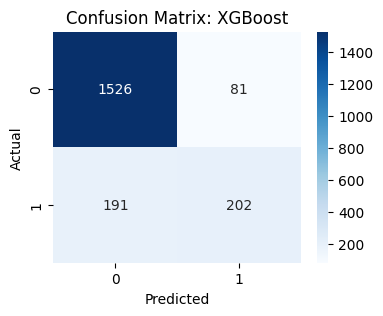

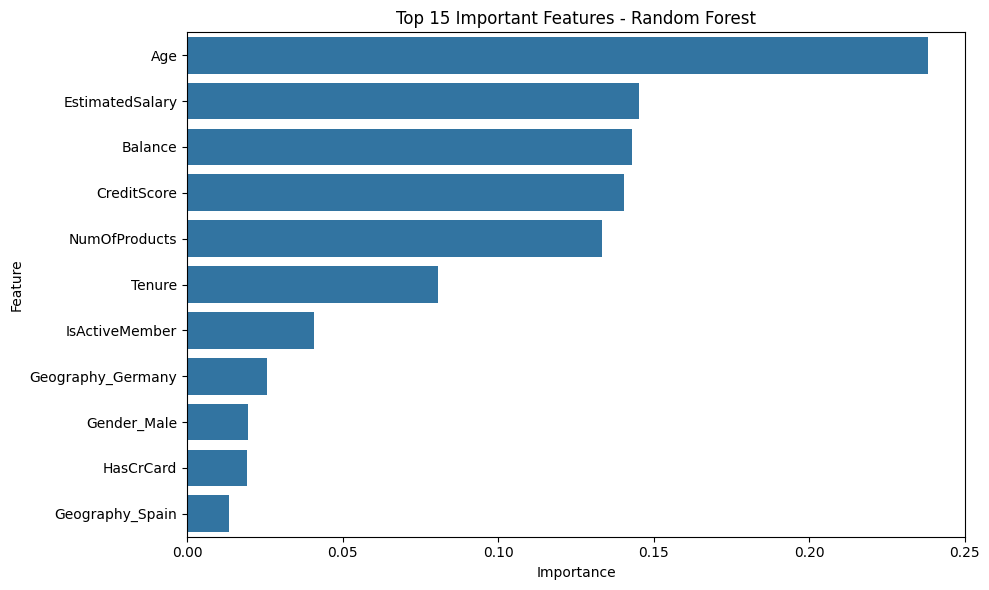

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Upload dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print(f"Initial rows: {len(df)}")

# Drop non-informative columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# --- Visualization 1: Churn Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited (Churn)')
plt.ylabel('Count')
plt.show()

# --- Visualization 2: Boxplot of Age by Churn ---
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age by Churn')
plt.show()

# --- Visualization 3: Correlation Heatmap (numerical features only) ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Encode categorical variables: Geography and Gender
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Define features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Results")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # --- Visualization 4: Confusion Matrix ---
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Feature importance from Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# --- Visualization 5: Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()
